In [1]:
import aiproteomics

In [2]:
import tensorflow as tf

2023-05-02 14:32:24.125918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 14:32:24.263517: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-02 14:32:24.287587: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-02 14:32:24.287600: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

# Load models

Building frag model


2023-05-02 14:32:25.431042: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-02 14:32:25.431184: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-02 14:32:25.431200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (godsnor-XPS-9320): /proc/driver/nvidia/version does not exist
2023-05-02 14:32:25.431678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


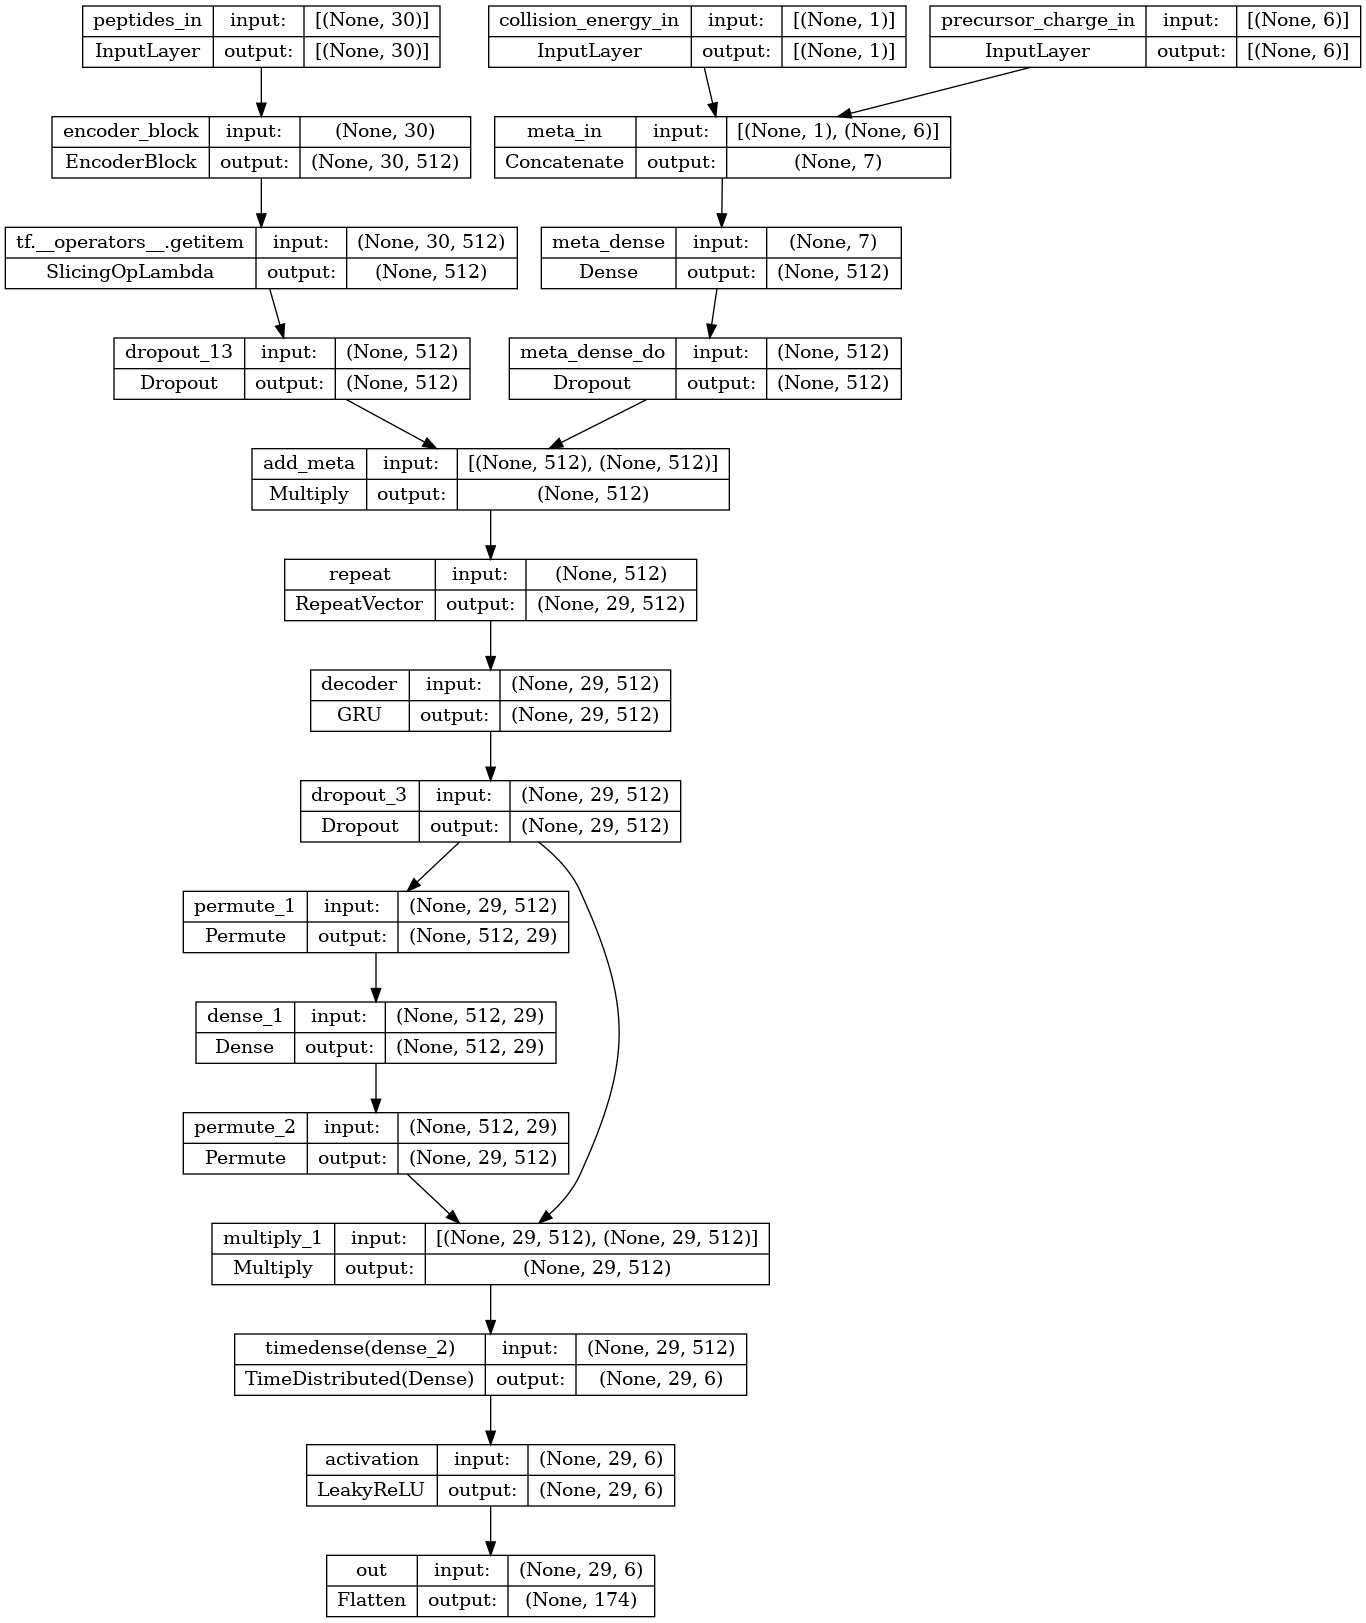

In [3]:
print('Building frag model')
from aiproteomics.frag.models import build_frag_transformer_model_slice0
model_frag = build_frag_transformer_model_slice0(
        num_layers = 6,                 # number of layers
        d_model = 512,
        num_heads = 8,                  # Number of attention heads
        d_ff = 2048,                    # Hidden layer size in feed forward network inside transformer
        dropout_rate = 0.1,             #
        vocab_size = 22,                # number of aminoacids
        max_len = 30                    # maximal peptide length
        )

# Load trained weights from (old) fragmentation transformer model
model_frag.load_weights('trained_transformer_frag/weight_49_0.25681.hdf5')

# Make a plot of the model
tf.keras.utils.plot_model(model_frag, show_shapes=True)

Building iRT model


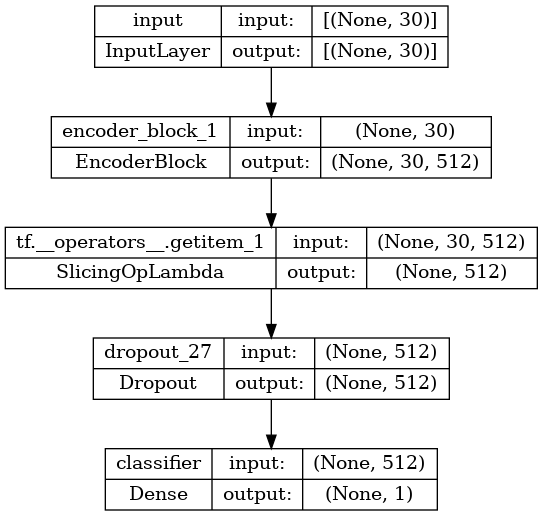

In [4]:
print('Building iRT model')
from aiproteomics.rt.models import build_rt_transformer_model

model_irt = build_rt_transformer_model(
        num_layers = 6,                 # number of layers
        d_model = 512,
        num_heads = 8,                  # Number of attention heads
        d_ff = 2048,                    # Hidden layer size in feed forward network inside transformer
        dropout_rate = 0.1,             #
        vocab_size = 22,                # number of aminoacids
        max_len = 30 
        )

# Don't have the weights right now but can uncomment when retrained
#model.load_weights('./trained_prosit_irt/weight_24_0.03205.hdf5')

# Make a plot of the model
tf.keras.utils.plot_model(model_irt, show_shapes=True)

## Read in the example list of peptides to process

In [5]:
!cat example.csv

modified_sequence,collision_energy,precursor_charge
MMPAAALIM(ox)R,35,3
MLAPPPIM(ox)K,30,2
MRALLLIPPPPM(ox)R,30,6


In [6]:
from aiproteomics.e2e.speclibgen import csv_to_msp

csv_to_msp('example.csv',
           'test.msp',
           model_frag=model_frag,
           model_irt=model_irt,
           batch_size_frag=1024,
           batch_size_iRT=1024,
           iRT_rescaling_mean = 56.35363441,
           iRT_rescaling_var = 1883.0160689
          )

2023-05-02 14:32:29.003551: E tensorflow/core/framework/node_def_util.cc:675] NodeDef mentions attribute epsilon which is not in the op definition: Op<name=_MklFusedBatchMatMulV2; signature=x:T, y:T, args:num_args*T -> output:T; attr=T:type,allowed=[DT_BFLOAT16, DT_FLOAT]; attr=adj_x:bool,default=false; attr=adj_y:bool,default=false; attr=num_args:int,min=0; attr=fused_ops:list(string),default=[]> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node model/encoder_block/encoder_layer/multi_head_attention/add}}


In [7]:
!cat test.msp

Name: MMPAAALIMR/3
MW: 374.19403587446
Comment: Parent=374.19403587446 Collision_energy=35.0 Mods=1/8,M,Oxidation ModString=MMPAAALIMR//Oxidation@M9/3 iRT=20.943050384521484
Num peaks: 22
175.118952167	0.4478343	"y1/0.0ppm"
132.047761467	0.0012691963	"b1/0.0ppm"
322.15434716699997	0.32797375	"y2/0.0ppm"
263.088246467	0.27696502	"b2/0.0ppm"
435.238411167	0.49965674	"y3/0.0ppm"
218.122843817	0.029959906	"y3^2)/0.0ppm"
360.141010467	0.024057517	"b3/0.0ppm"
548.322475167	0.54867864	"y4/0.0ppm"
274.664875817	0.06270932	"y4^2)/0.0ppm"
431.178124467	0.0121444585	"b4/0.0ppm"
216.092700467	0.0010822752	"b4^2)/0.0ppm"
144.39755913366665	0.0013124398	"b4^3)/0.0ppm"
619.359589167	1.0	"y5/0.0ppm"
310.183432817	0.11255463	"y5^2)/0.0ppm"
690.3967031669999	0.8682508	"y6/0.0ppm"
345.70198981699997	0.11513035	"y6^2)/0.0ppm"
761.4338171669999	0.35829362	"y7/0.0ppm"
381.22054681699996	0.08305371	"y7^2)/0.0ppm"
858.4865811669999	0.04886579	"y8/0.0ppm"
429.74692881699997	0.07552263	"y8^2)/0.0ppm"
286.833711

[Text(0.5, 0, 'epoch')]

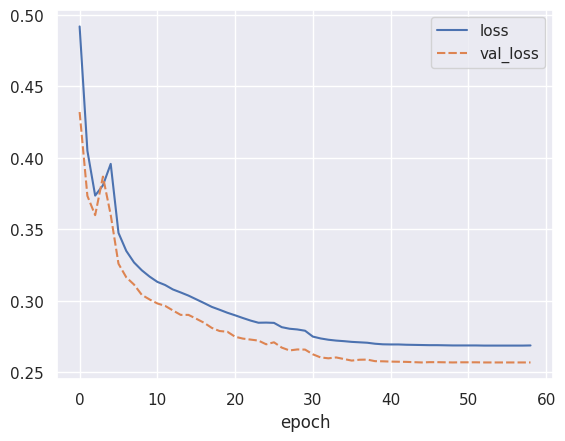

In [8]:
import pandas as pd
import seaborn as sns

sns.set_theme()

loss_df = pd.read_table('loss_training', delim_whitespace=True, skiprows=0)
#print(loss_df)

ax = sns.lineplot(data=loss_df)
ax.set(xlabel='epoch')



## Evaluate loss/accuracy

In [9]:
import keras.backend as k
import numpy as np
def masked_spectral_distance(true, pred):
    # Note, fragment ions that cannot exists (i.e. y20 for a 7mer) must have the value  -1.

    epsilon = k.epsilon()
    pred_masked = ((true + 1) * pred) / (true + 1 + epsilon)
    true_masked = ((true + 1) * true) / (true + 1 + epsilon)
    pred_norm = k.l2_normalize(true_masked, axis=-1)
    true_norm = k.l2_normalize(pred_masked, axis=-1)
    product = k.sum(pred_norm * true_norm, axis=1)
    arccos = tf.acos(product)
    return 2 * arccos / np.pi

## Spectral angle distribution

In [10]:
N = -1
with h5py.File('holdout_hcd.hdf5', "r") as f:
    ho_x = [f['sequence_integer'][:N], f['precursor_charge_onehot'][:N], f['collision_energy_aligned_normed'][:N]]
    ho_y = f['intensities_raw'][:N]
    
    model_frag.compile(loss=masked_spectral_distance, optimizer='adam', metrics=['accuracy'])

NameError: name 'h5py' is not defined

# New model

In [ ]:
from aiproteomics.frag.models import build_model_transformer_encoder_prosit_decoder
model_frag = build_model_transformer_encoder_prosit_decoder(
        num_layers = 6,                 # number of layers
        d_model = 512,
        num_heads = 8,                  # Number of attention heads
        d_ff = 2048,                    # Hidden layer size in feed forward network inside transformer
        dropout_rate = 0.1,             #
        vocab_size = 22,                # number of aminoacids
        max_len = 30                    # maximal peptide length
        )

# Make a plot of the model
tf.keras.utils.plot_model(model_frag, show_shapes=True)

# Prosit1

In [ ]:
from aiproteomics.modelgen.prosit1_gen import build_prosit1_model

model_prosit = build_prosit1_model()

# Load trained weights from (old) fragmentation transformer model
model_prosit.load_weights('prosit/weight_32_0.10211.hdf5')

# Make a plot of the model
tf.keras.utils.plot_model(model_prosit, show_shapes=True)

## Evaluate loss/accuracy

## Spectral angle distribution

In [ ]:
import keras.backend as k
def normalized_spectral_contrast_distance(true_pred):
    print(true_pred)
    true = true_pred[0]
    pred = true_pred[1]
    pred_norm = k.l2_normalize(true, axis=-1)
    true_norm = k.l2_normalize(pred, axis=-1)
    product = k.sum(pred_norm * true_norm, axis=1)
    arccos = tf.acos(product)
    return 1 - 2 * arccos / np.pi

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]
np.stack((a,b), axis=1)

In [ ]:
true_pred = np.stack((tf.cast(ho_y, tf.float32), pred), axis=1)
vfunc = np.vectorize(normalized_spectral_contrast_distance)
prosit_spectral_distance = vfunc(true_pred)
prosit_spectral_distance

In [ ]:
ax = sns.histplot(data=prosit_spectral_distance)
ax.set(ylabel="Spectral Distance")